In [1022]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [1023]:
white_wine = pd.read_csv('/Users/enzowurtele/Desktop/data-science/projects/winequality-white.csv', sep=';')

In [1024]:
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'very_low'
if value <= 3 else 'low'
if value <= 5 else 'medium'
if value <= 6 else 'high'
if value <= 9 else 'very_high')

white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories=['very_low','low', 'medium', 'high', 'very_high'])


In [1025]:
white_wine_clean = white_wine.drop('quality', axis=1)
white_wine_clean['quality_label'] = white_wine_clean['quality_label'].astype(str)
white_wine_clean = white_wine_clean[~white_wine_clean['quality_label'].isin(['very_low', 'very_high'])]
white_wine_clean['quality_label'] = white_wine_clean['quality_label'].replace({'low':0, 'medium':1, 'high':2})
white_wine_clean = white_wine_clean.drop('citric acid',axis=1)


white_wine_clean.head()

/var/folders/cs/28k39qrd4fd91ybwdd69fndw0000gn/T/ipykernel_8260/2585328144.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  white_wine_clean['quality_label'] = white_wine_clean['quality_label'].replace({'low':0, 'medium':1, 'high':2})


,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.0,0.27,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [1026]:
X = white_wine_clean.drop('quality_label', axis=1)
y = white_wine_clean['quality_label']

In [1027]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1028]:
# data normalisation with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

In [1029]:
white_model = RandomForestClassifier(random_state=42, n_estimators=280)
white_model.fit(X_train_norm, y_train)

RandomForestClassifier(n_estimators=280, random_state=42)

In [1030]:
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import accuracy_score, classification_report

preds = white_model.predict(X_test_norm)
acc = accuracy_score(y_test, preds)

print("Classification Accuracy:", acc)
print(classification_report(y_test, preds))

Classification Accuracy: 0.7407786885245902
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       356
           1       0.72      0.76      0.74       433
           2       0.76      0.64      0.70       187

    accuracy                           0.74       976
   macro avg       0.75      0.72      0.73       976
weighted avg       0.74      0.74      0.74       976



In [1031]:
cf_matrix = confusion_matrix(y_test, preds)


print(cf_matrix)


[[275  72   9]
 [ 77 328  28]
 [  9  58 120]]


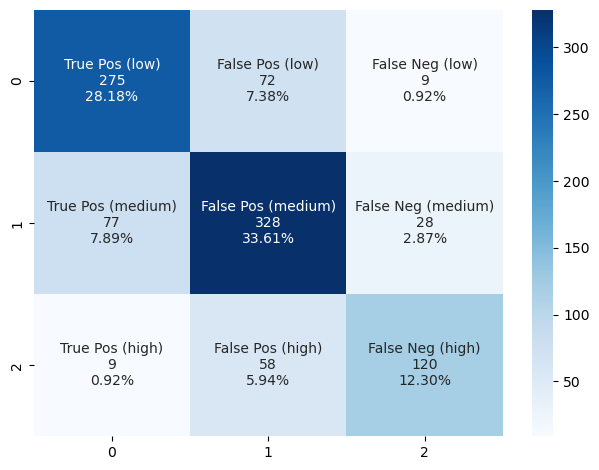

In [1032]:
group_names = ['True Pos (low)', 'False Pos (low)', 'False Neg (low)',  # low class
               'True Pos (medium)', 'False Pos (medium)', 'False Neg (medium)',  # medium class
               'True Pos (high)', 'False Pos (high)', 'False Neg (high)']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.tight_layout()

In [1033]:
intefered_with_data_1 = np.array([   
   
    7.323322,     # fixed acidity
    0.289170,     # volatile acidity -
    5.652676,     # residual sugar
    0.044576,     # chlorides
    29.356415,    # free sulfur dioxide
    109.891151,   # total sulfur dioxide -
    0.993027,     # density -
    3.213972,     # pH
    0.524499,     # sulphates
    11.433359,     # alcohol -
])

# Reshape the data to match the model's expected input shape (1 sample, 11 features)
intefered_with_data = intefered_with_data.reshape(1, -1)

# Step 1: Fit the scaler on your training data (if it's not done yet)
# Here, X_train is the data used to train the model. Ensure this scaler was fitted with X_train.
scaler = MinMaxScaler()
scaler.fit(X_train_norm)  # Fit on the training data only!

# Save the fitted scaler (optional but useful for future predictions)
# joblib.dump(scaler, 'scaler.pkl')

# Step 2: Transform the new data using the fitted scaler
intefered_with_data_scaled = scaler.transform(intefered_with_data)

# Step 3: Make predictions using the trained Random Forest model
# Assuming white_model is your trained model
prediction = white_model.predict(intefered_with_data_scaled)

# Output the predicted quality value
print(f"Predicted quality: {prediction[0]}")


Predicted quality: 1


In [1034]:
data_ok_quality = np.array([
    7.085709,     # fixed acidity
    0.289170,     # volatile acidity
    4.827721,     # residual sugar
    0.044576,     # chlorides
    31.055208,    # free sulfur dioxide
    109.891151,   # total sulfur dioxide
    0.993027,     # density
    3.227651,     # pH
    0.541488,     # sulphates
    11.433359,    # alcohol
])

# Reshape the data to match the model's expected input shape (1 sample, 11 features)
data_ok_quality = data_ok_quality.reshape(1, -1)

# Step 1: Fit the scaler on your training data (if it's not done yet)
# Here, X_train is the data used to train the model. Ensure this scaler was fitted with X_train.
scaler = MinMaxScaler()
scaler.fit(X_train_norm)  # Fit on the training data only!

# Save the fitted scaler (optional but useful for future predictions)
# joblib.dump(scaler, 'scaler.pkl')

# Step 2: Transform the new data using the fitted scaler
data_ok_quality_scaled = scaler.transform(data_ok_quality)

# Step 3: Make predictions using the trained Random Forest model
# Assuming white_model is your trained model
prediction = white_model.predict(data_ok_quality)

# Output the predicted quality value
print(f"Predicted quality: {prediction[0]}")

Predicted quality: 1
